In [5]:
#Reading the data
import pandas as pd 
import numpy as np 
data=pd.read_csv("RELIANCE.csv")
data.head(2)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.5,251.70,237.5,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.4,271.85,251.3,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN


In [6]:

data.describe(include='O')

,Date,Symbol,Series
count,5075,5075,5075
unique,5075,1,1
top,2002-04-15,RELIANCE,EQ
freq,1,5075,5075


In [7]:
#Removing empty or null values
data.dropna(inplace=True)
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [8]:
#Creating data for prophet
X=data.drop(["Symbol","Series","VWAP"],axis=1)
X.head(2)


,Date,Prev Close,Open,High,Low,Last,Close,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2850,2011-06-01,951.85,952.00,958.65,943.65,947.5,946.80,1838452,1.742538e+14,58630.0,901415.0,0.4903
2851,2011-06-02,946.80,936.55,954.70,936.55,952.5,951.05,2152963,2.039039e+14,63061.0,1066759.0,0.4955


In [9]:
Y=data["VWAP"]
Y.head(2)

2850    947.83
2851    947.09
Name: VWAP, dtype: float64

In [10]:
train_data=pd.DataFrame()
train_data['ds']=pd.to_datetime(X["Date"])
train_data['y']=Y
train_data.head(2)

,ds,y
2850,2011-06-01,947.83
2851,2011-06-02,947.09


In [11]:
#Fitting data to prophrt
from fbprophet import Prophet
pro=Prophet()
pro.fit(train_data)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
#Creating values for future
future=pro.make_future_dataframe(periods=1000)
future.tail(2)

,ds
3223,2023-02-22
3224,2023-02-23


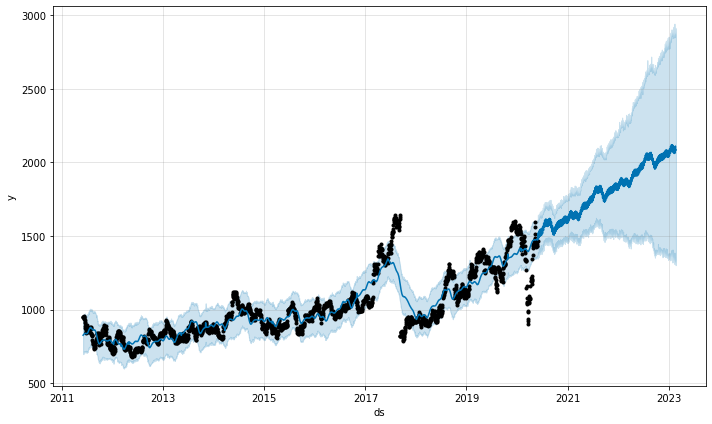

In [13]:
#Plotting the predicted data
forecast=pro.predict(future)
fig1=pro.plot(forecast)

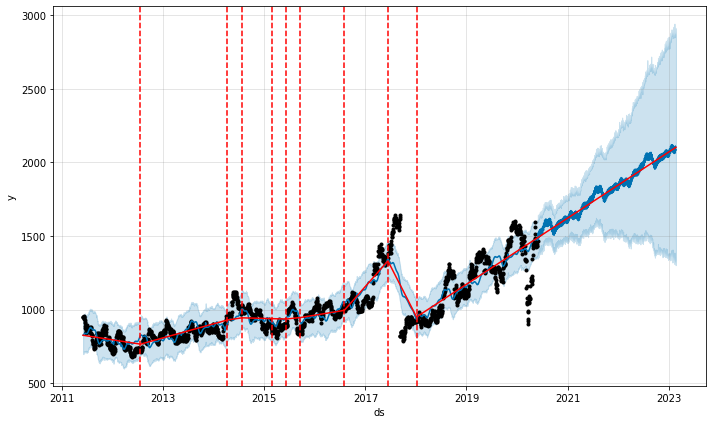

In [17]:
#adding changepoints 
from fbprophet.plot import add_changepoints_to_plot
fig=pro.plot(forecast)
change_points=add_changepoints_to_plot(fig.gca(),pro,forecast)

In [14]:
#Dates of changepoints
pro.changepoints

71     2011-09-13
142    2011-12-28
213    2012-04-10
285    2012-07-19
356    2012-11-01
427    2013-02-13
498    2013-05-29
569    2013-09-10
640    2013-12-23
712    2014-04-04
783    2014-07-21
854    2014-11-11
925    2015-02-23
996    2015-06-08
1067   2015-09-15
1139   2016-01-04
1210   2016-04-21
1281   2016-08-01
1352   2016-11-16
1423   2017-02-27
1494   2017-06-12
1566   2017-09-25
1637   2018-01-05
1708   2018-04-23
1779   2018-08-01
Name: ds, dtype: datetime64[ns]

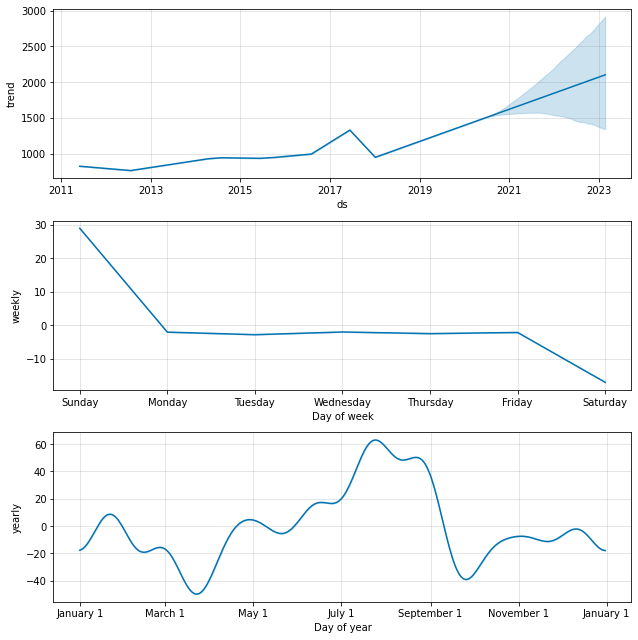

In [15]:
#plotting components of forecast
fig3=pro.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


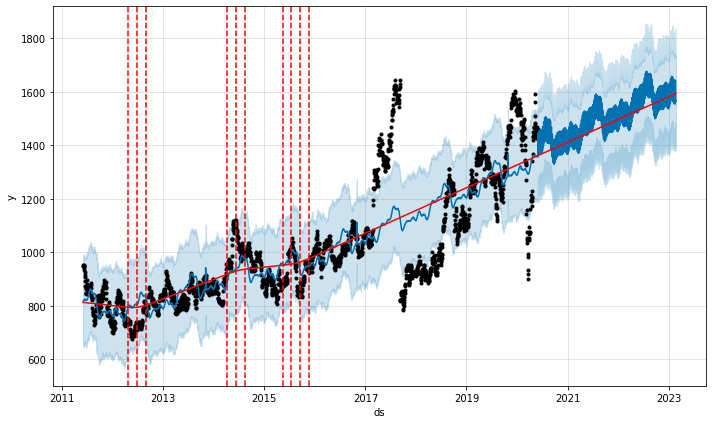

In [21]:
#changing the changepoint range
pro_change=Prophet(changepoint_range=0.5)
forecast1=pro_change.fit(train_data).predict(future)
fig2=pro_change.plot(forecast1)
changed_change_points=add_changepoints_to_plot(fig2.gca(),pro_change,forecast1)